<a href="https://colab.research.google.com/github/canasep/mack_projeto1/blob/main/25_03_19_18_00_PROJETO_APLICADO1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

link collab to github

In [1]:
!git clone https://github.com/canasep/mack_projeto1.git

Cloning into 'mack_projeto1'...
remote: Enumerating objects: 201, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 201 (delta 24), reused 2 (delta 2), pack-reused 148 (from 1)
Receiving objects: 100% (201/201), 1.80 MiB | 18.39 MiB/s, done.
Resolving deltas: 100% (77/77), done.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/mack_projeto1/dataset/arquivos/RAW.csv'
try:
  df = pd.read_csv(file_path)
  print("Dataset created successfully!")
except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except Exception as e:
  print(f"An error occurred: {e}")

Dataset created successfully!


In [4]:
#Convertendo as datas para padronizar o formato (limpeza e padronização)
df['data_primeiro_pedido'] = pd.to_datetime(df['data_primeiro_pedido'], format='%d/%m/%Y')
df['data_entregue'] = pd.to_datetime(df['data_entregue'], format='%d/%m/%Y')
df['data_assinado'] = pd.to_datetime(df['data_assinado'], format='%d/%m/%Y')

In [5]:
janeiro_df = df[(df['data_primeiro_pedido'].dt.year == 2025)&(df['data_primeiro_pedido'].dt.month.isin([ 1, 2]))]
print(janeiro_df.shape[0], "restaurantes ativados em janeiro ou fevereiro de 2025") #quantos restaurantes fizeram o primeiro pedido em janeiro
m2validos_df = df[(df['data_primeiro_pedido'].dt.year == 2024)&(df['data_primeiro_pedido'].dt.month.isin([ 5, 6, 7, 8, 9, 10, 11, 12]))]
print(m2validos_df.shape[0], "restaurantes ativados até dezembro de 2024")
print(df.shape[0], "restaurantes no total")

228 restaurantes ativados em janeiro ou fevereiro de 2025
253 restaurantes ativados até dezembro de 2024
481 restaurantes no total


In [6]:
M2_e_M1_menor_10 = m2validos_df[(m2validos_df['pedidos_m1'] < 10) & (m2validos_df['pedidos_m2'] < 10)]
print(M2_e_M1_menor_10.shape[0], "restaurantes com pedidos em M1 e M2 menores que 10")

63 restaurantes com pedidos em M1 e M2 menores que 10


In [7]:
m2validos_e_ativos = m2validos_df[~m2validos_df.index.isin(M2_e_M1_menor_10.index)] #aqui pegando o DF de restaurantes que fizeram o pedido anterior a janeiro e que tem
M2_em_alta = m2validos_e_ativos[m2validos_e_ativos['pedidos_m2'] >= m2validos_e_ativos['pedidos_m1']] #criar os M2 em alta descartando os inativos ou ativados recentemente
print(M2_em_alta.shape[0], "restaurantes com M2 maior ou igual a M1 (excluindo os de baixa operação e recentemente implantados)")
M2_em_queda = m2validos_e_ativos[    m2validos_e_ativos['pedidos_m2'] < m2validos_e_ativos['pedidos_m1']] #criar os M2 em alta descartando os inativos ou ativados recentemente
print(M2_em_queda.shape[0], "restaurantes com M2 menor que M1 (excluindo os de baixa operação e recentemente implantados)")

76 restaurantes com M2 maior ou igual a M1 (excluindo os de baixa operação e recentemente implantados)
114 restaurantes com M2 menor que M1 (excluindo os de baixa operação e recentemente implantados)


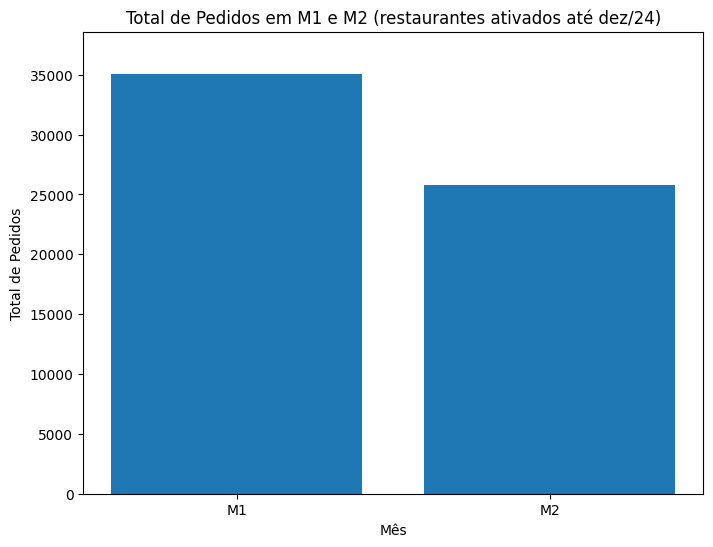

In [8]:
# 1. Calcular o total de pedidos para M1 e M2 no m2validos_df
total_m1 = m2validos_df['pedidos_m1'].sum()
total_m2 = m2validos_df['pedidos_m2'].sum()

# 2. Criar o gráfico de barras
plt.figure(figsize=(8, 6))

# Dados para o gráfico
meses = ['M1', 'M2']
totais = [total_m1, total_m2]

plt.bar(meses, totais, width=0.8)

# 3. Customizações do gráfico
plt.title('Total de Pedidos em M1 e M2 (restaurantes ativados até dez/24)')
plt.xlabel('Mês')
plt.ylabel('Total de Pedidos')
plt.ylim(0, max(totais)*1.1)

# 4. Exibir o gráfico
plt.show()

In [9]:
m2validos_df['Tempo de Ativação'] = (m2validos_df['data_primeiro_pedido'] - m2validos_df['data_assinado']).dt.days #criando o indicador te tempo de ativação
print(m2validos_df[['loja', 'data_assinado', 'data_primeiro_pedido', 'Tempo de Ativação']].head(10))

        loja data_assinado data_primeiro_pedido  Tempo de Ativação
0  Loja - 01    2024-07-09           2024-10-03                 86
1  Loja - 02    2024-07-09           2024-08-14                 36
2  Loja - 03    2024-07-09           2024-08-28                 50
3  Loja - 04    2024-07-10           2024-09-20                 72
4  Loja - 05    2024-07-12           2024-08-29                 48
5  Loja - 06    2024-07-12           2024-09-06                 56
6  Loja - 07    2024-07-12           2024-07-29                 17
7  Loja - 08    2024-07-12           2024-08-09                 28
8  Loja - 09    2024-07-12           2024-07-25                 13
9  Loja - 10    2024-07-17           2024-08-28                 42


<ipython-input-9-5d9cc0da86c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m2validos_df['Tempo de Ativação'] = (m2validos_df['data_primeiro_pedido'] - m2validos_df['data_assinado']).dt.days #criando o indicador te tempo de ativação


In [10]:
m2validos_df['Media Pedidos M1 e M2'] = (m2validos_df['pedidos_m1'] + m2validos_df['pedidos_m2']) / 2
print(m2validos_df[['loja', 'pedidos_m1', 'pedidos_m2', 'Media Pedidos M1 e M2']].head(10))

        loja  pedidos_m1  pedidos_m2  Media Pedidos M1 e M2
0  Loja - 01           0           0                    0.0
1  Loja - 02         251         187                  219.0
2  Loja - 03          71         113                   92.0
3  Loja - 04          18          19                   18.5
4  Loja - 05         112          85                   98.5
5  Loja - 06          21          51                   36.0
6  Loja - 07          24           3                   13.5
7  Loja - 08           0           2                    1.0
8  Loja - 09          34          36                   35.0
9  Loja - 10          24           0                   12.0


<ipython-input-10-c43d88530b16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m2validos_df['Media Pedidos M1 e M2'] = (m2validos_df['pedidos_m1'] + m2validos_df['pedidos_m2']) / 2


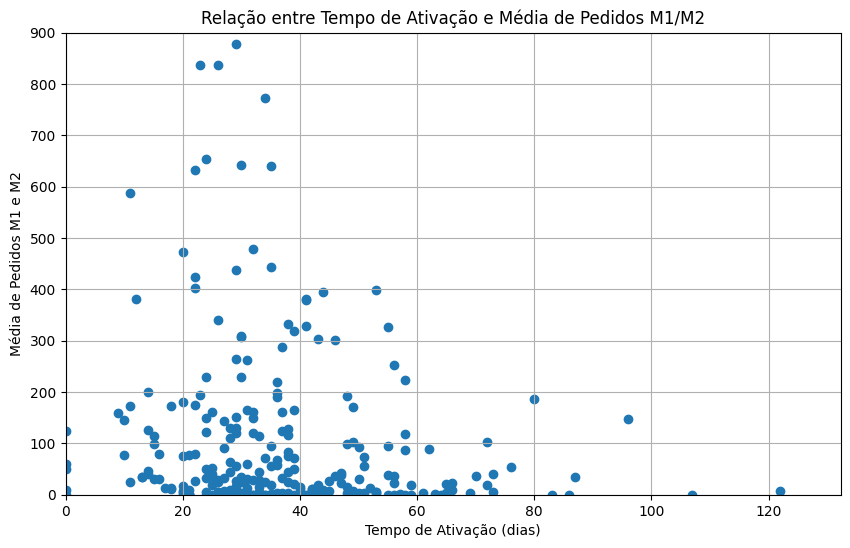

In [11]:
plt.figure(figsize=(10, 6))

plt.scatter(
    m2validos_df['Tempo de Ativação'],
    m2validos_df['Media Pedidos M1 e M2']
)

plt.title('Relação entre Tempo de Ativação e Média de Pedidos M1/M2')
plt.xlabel('Tempo de Ativação (dias)')
plt.ylabel('Média de Pedidos M1 e M2')

plt.xlim(0)         # tirando outliers para melhor visualização
plt.ylim(0, 900)    # tirando outliers para melhor visualização

plt.grid(True)

plt.show()

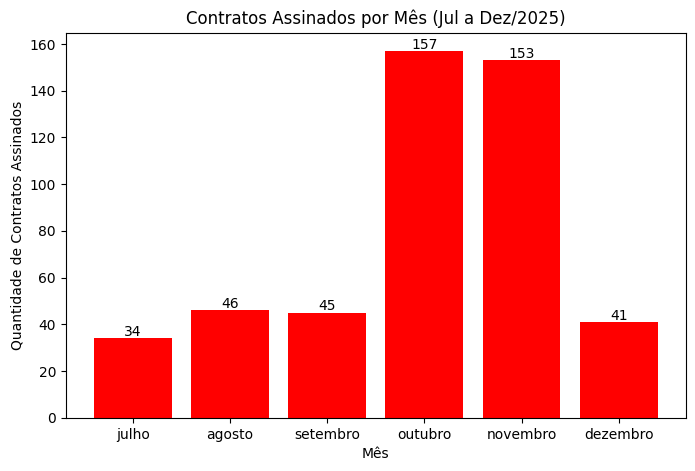

In [14]:
contagem_por_mes = df.groupby(df['data_assinado'].dt.month).size()
contagem_por_mes = contagem_por_mes.reindex([7, 8, 9, 10, 11, 12], fill_value=0)

mes_map = {
    7: 'julho',
    8: 'agosto',
    9: 'setembro',
    10: 'outubro',
    11: 'novembro',
    12: 'dezembro'
}
contagem_por_mes.index = [mes_map[m] for m in contagem_por_mes.index]

plt.figure(figsize=(8, 5))
plt.bar(contagem_por_mes.index, contagem_por_mes.values, color='red')

plt.title('Contratos Assinados por Mês (Jul a Dez/2025)')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Contratos Assinados')

# 5. Adicionar valores acima de cada barra
for i, valor in enumerate(contagem_por_mes.values):
    plt.text(i, valor + 1, str(valor), ha='center')

plt.show()

In [16]:
contagem_por_mes = df.groupby(df['data_assinado'].dt.month).size()
contagem_por_mes = contagem_por_mes.reindex([7, 8, 9, 10, 11, 12], fill_value=0)

mes_map = {
    7: 'julho',
    8: 'agosto',
    9: 'setembro',
    10: 'outubro',
    11: 'novembro',
    12: 'dezembro'
}
contagem_por_mes.index = [mes_map[m] for m in contagem_por_mes.index]

plt.figure(figsize=(8, 5))
plt.bar(contagem_por_mes.index, contagem_por_mes.values, color='red')

plt.title('Contratos Assinados por Mês (Jul a Dez/2025)')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Contratos Assinados')

# 5. Adicionar valores acima de cada barra
for i, valor in enumerate(contagem_por_mes.values):
    plt.text(i, valor + 1, str(valor), ha='center')

plt.show()

,loja,tipo,Shopping,software,data_assinado,data_entregue,data_primeiro_pedido,Irregular,pedidos_m0,pedidos_m1,pedidos_m2,Tempo de Ativação
0,Loja - 01,Lanches,Não,ANOTA,2024-07-09,2024-08-19,2024-10-03,NaN,2,0,0,86
1,Loja - 02,Hamburgueria / Hot Dog,Não,ANOTA,2024-07-09,2024-07-18,2024-08-14,NaN,101,251,187,36
2,Loja - 03,Hamburgueria / Hot Dog,Não,ANOTA,2024-07-09,2024-07-18,2024-08-28,NaN,16,71,113,50
3,Loja - 04,Hamburgueria / Hot Dog,Não,ANOTA,2024-07-10,2024-08-23,2024-09-20,NaN,10,18,19,72
4,Loja - 05,Hamburgueria / Hot Dog,Não,ANOTA,2024-07-12,2024-07-27,2024-08-29,NaN,20,112,85,48


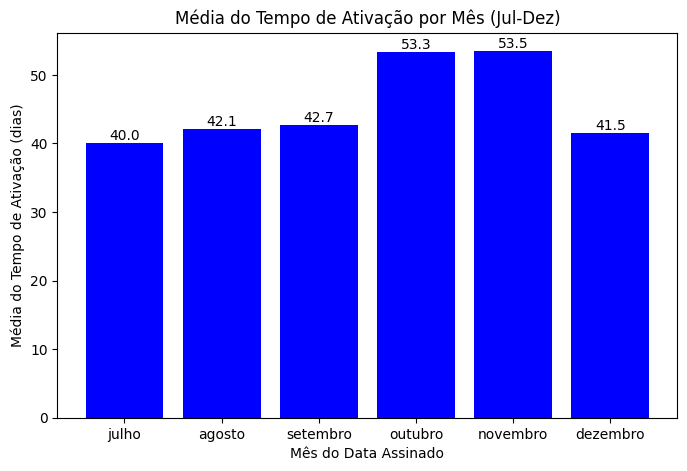

In [17]:
# Filtrar o dataframe para considerar apenas os restaurantes com data_assinado entre julho e dezembro
df_filtrado_2024 = df[df['data_assinado'].dt.year.isin([2024])]

# Agrupar por mês (da data_assinado) e calcular a média do Tempo de Ativação
media_tempo_ativacao = df_filtrado_2024.groupby(df_filtrado_2024['data_assinado'].dt.month)['Tempo de Ativação'].mean()

# Reordenar para garantir a sequência de julho a dezembro
media_tempo_ativacao = media_tempo_ativacao.reindex([7, 8, 9, 10, 11, 12], fill_value=0)

# Mapear os números dos meses para os nomes em português
mes_map = {
    7: 'julho',
    8: 'agosto',
    9: 'setembro',
    10: 'outubro',
    11: 'novembro',
    12: 'dezembro'
}
media_tempo_ativacao.index = [mes_map[m] for m in media_tempo_ativacao.index]

# Criar o gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(media_tempo_ativacao.index, media_tempo_ativacao.values, color='blue')

plt.xlabel('Mês do Data Assinado')
plt.ylabel('Média do Tempo de Ativação (dias)')
plt.title('Média do Tempo de Ativação por Mês (Jul-Dez)')

# Adicionar os valores acima de cada barra
for i, valor in enumerate(media_tempo_ativacao.values):
    plt.text(i, valor + 0.5, f"{valor:.1f}", ha='center')

plt.show()